In [34]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent  # because notebook is in notebooks/
pred_path = project_root / "data" / "processed" / "test_predictions_life_expectancy_automl.csv"

preds = pd.read_csv(pred_path)
preds.head()


,iso3,country_name,year,life_expectancy,gdp_per_capita,co2_per_capita,y_actual,y_pred_linear,y_pred_automl
0,MNG,Mongolia,1993,60.824220,1418.065607,4.044,60.824220,62.813935,64.263207
1,NLD,Netherlands,2001,78.190244,41297.319883,10.966,78.190244,76.077297,78.015631
2,GAB,Gabon,2005,62.978000,7130.225058,4.252,62.978000,66.944917,68.120945
3,IRQ,Iraq,2015,69.977000,4440.141893,3.795,69.977000,68.453716,72.221505
4,NAM,Namibia,2009,55.347000,3989.207114,1.280,55.347000,66.208689,64.246512


In [36]:
preds["error_linear"] = preds["y_pred_linear"] - preds["y_actual"]
preds["error_automl"] = preds["y_pred_automl"] - preds["y_actual"]

preds[["error_linear", "error_automl"]].describe()


,error_linear,error_automl
count,1242.000000,1242.000000
mean,-0.890664,-0.347176
std,6.829903,3.923162
min,-13.157854,-19.372110
25%,-6.266953,-2.160521
50%,-2.414765,-0.516936
75%,2.928983,1.147441
max,50.343949,36.280660


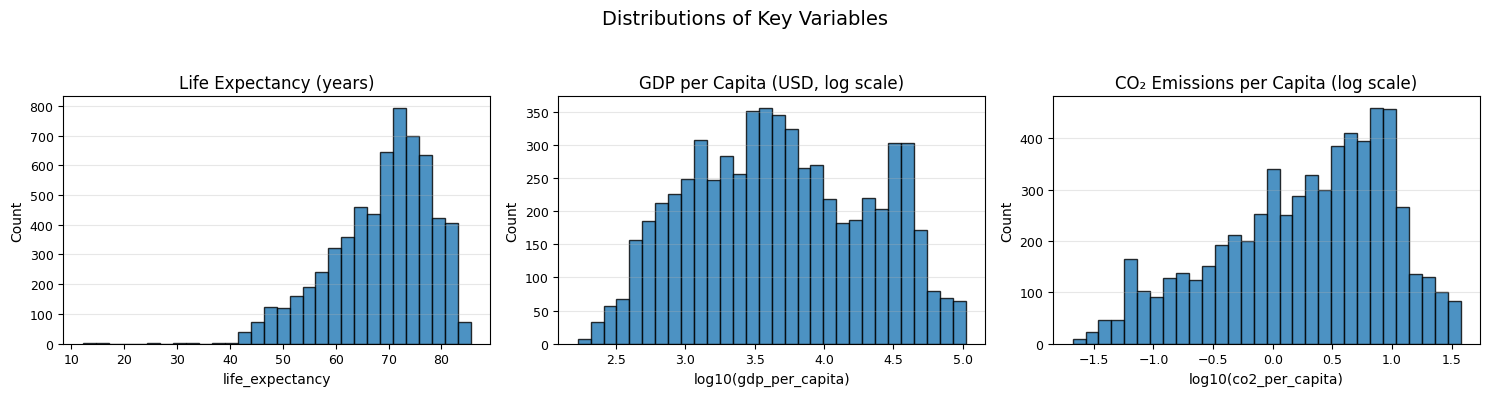

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df_clean = pd.read_csv("../data/processed/cleaned_life_expectancy_gdp_co2.csv")

cols = ["life_expectancy", "gdp_per_capita", "co2_per_capita"]
titles = [
    "Life Expectancy (years)",
    "GDP per Capita (USD, log scale)",
    "CO₂ Emissions per Capita (log scale)"
]

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, col, title in zip(axes, cols, titles):
    data = df_clean[col].dropna()

    # log-transform the skewed ones for nicer shape
    if col in ["gdp_per_capita", "co2_per_capita"]:
        data = data[data > 0]  # drop non-positive before log
        data = data.apply(np.log10)
        xlabel = f"log10({col})"
    else:
        xlabel = col

    ax.hist(
        data,
        bins=30,
        edgecolor="black",
        alpha=0.8,
    )
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(xlabel, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.grid(axis="y", alpha=0.3)
    ax.tick_params(axis="both", labelsize=9)

fig.suptitle("Distributions of Key Variables", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


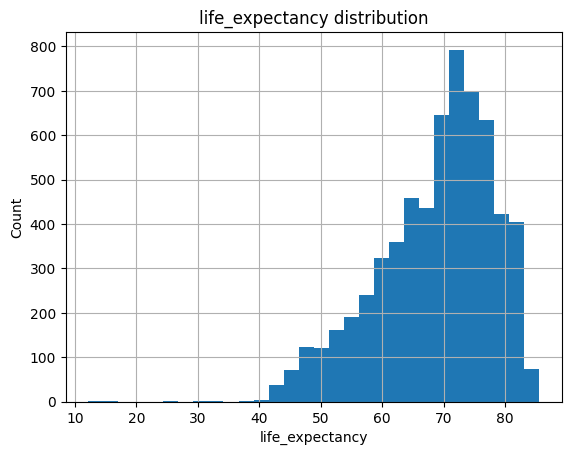

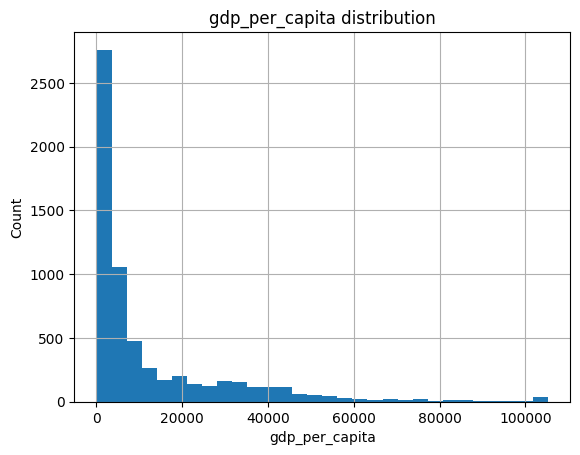

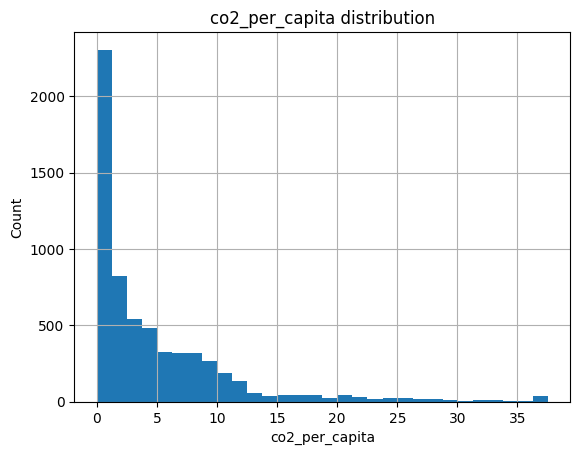

In [37]:
import matplotlib.pyplot as plt
df_clean = pd.read_csv('../data/processed/cleaned_life_expectancy_gdp_co2.csv')
for col in ["life_expectancy", "gdp_per_capita", "co2_per_capita"]:
    df_clean[col].hist(bins=30)
    plt.title(f"{col} distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


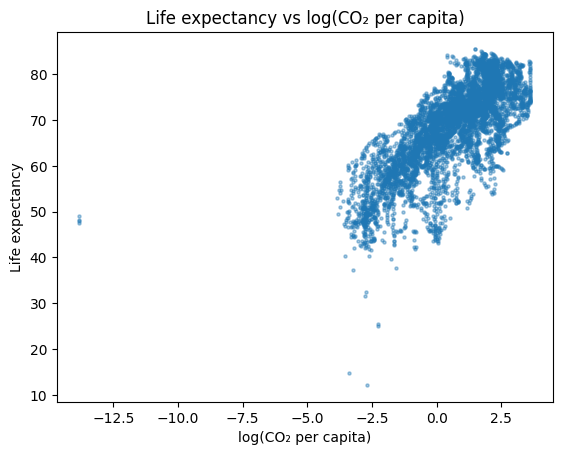

In [38]:
import numpy as np
plt.scatter(np.log(df_clean["co2_per_capita"] + 1e-6), df_clean["life_expectancy"], s=5, alpha=0.4)
plt.xlabel("log(CO₂ per capita)")
plt.ylabel("Life expectancy")
plt.title("Life expectancy vs log(CO₂ per capita)")
plt.show()


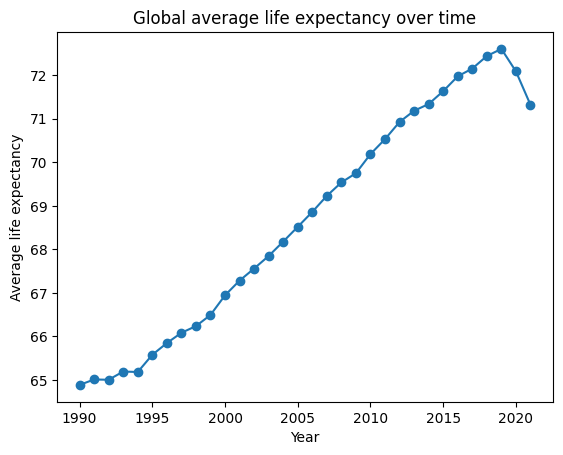

In [39]:
mean_by_year = df_clean.groupby("year")["life_expectancy"].mean().reset_index()

plt.plot(mean_by_year["year"], mean_by_year["life_expectancy"], marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average life expectancy")
plt.title("Global average life expectancy over time")
plt.show()


In [40]:
import pandas as pd
from pathlib import Path

project_root = Path.cwd().parent
pred_path = project_root / "data" / "processed" / "test_predictions_life_expectancy_automl.csv"
preds = pd.read_csv(pred_path)


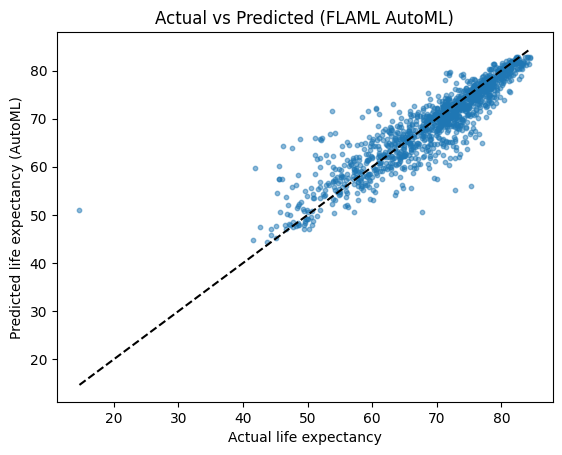

In [41]:
plt.scatter(preds["y_actual"], preds["y_pred_automl"], s=10, alpha=0.5)
min_val = preds[["y_actual", "y_pred_automl"]].min().min()
max_val = preds[["y_actual", "y_pred_automl"]].max().max()
plt.plot([min_val, max_val], [min_val, max_val], "k--")
plt.xlabel("Actual life expectancy")
plt.ylabel("Predicted life expectancy (AutoML)")
plt.title("Actual vs Predicted (FLAML AutoML)")
plt.show()


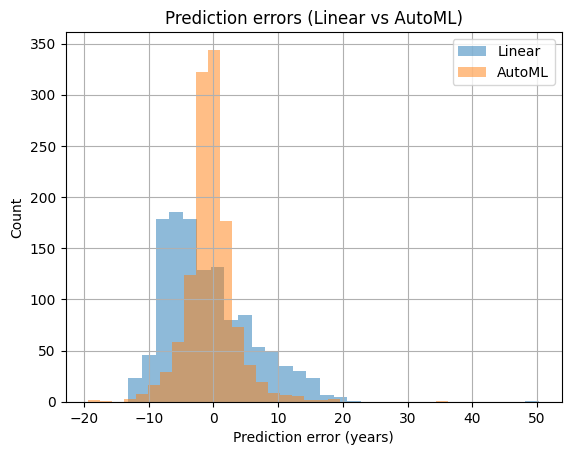

In [42]:
preds["error_linear"] = preds["y_pred_linear"] - preds["y_actual"]
preds["error_automl"] = preds["y_pred_automl"] - preds["y_actual"]

preds[["error_linear", "error_automl"]].describe()

preds["error_linear"].hist(bins=30, alpha=0.5, label="Linear")
preds["error_automl"].hist(bins=30, alpha=0.5, label="AutoML")
plt.legend()
plt.title("Prediction errors (Linear vs AutoML)")
plt.xlabel("Prediction error (years)")
plt.ylabel("Count")
plt.show()


In [48]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("../data/processed/merged_dataset_with_continents.csv")
df = df.sort_values("year")

continent_order = ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]
df["continent"] = pd.Categorical(df["continent"], categories=continent_order, ordered=True)

fig = px.scatter(
    df,
    x="gdp_per_capita",
    y="life_expectancy",
    animation_frame="year",
    animation_group="country_name",
    size="co2_per_capita",
    color="continent",
    facet_col="continent",
    facet_col_wrap=3,
    hover_name="country_name",       # show country name on hover
    hover_data={    
        "continent": False,                 # hide continent on hover
        "gdp_per_capita": True,
        "life_expectancy": True,
        "co2_per_capita": True
    },
    log_x=True,
    size_max=45,
    range_x=[100, 100000],
    range_y=[25, 90],
    opacity=0.8,
    title="GDP vs Life Expectancy (Bubble Size = CO₂ Emissions)"
)

# Clean background
fig.update_layout(
    plot_bgcolor="white",
    paper_bgcolor="white",
    title_x=0.5,
    legend_title_text="Continent",
    margin=dict(t=100, l=40, r=40, b=40)
)

fig.update_xaxes(showgrid=True, gridcolor="lightgray")
fig.update_yaxes(showgrid=True, gridcolor="lightgray")

# Remove "continent=" text from facet titles
for a in fig.layout.annotations:
    a.text = a.text.replace("continent=", "")

fig.show()


In [44]:
import plotly.express as px
import pandas as pd

df = preds

fig = px.choropleth(
    df,
    locations="iso3",
    color="life_expectancy",
    hover_name="iso3",   # can be replaced with country name
    projection="natural earth"
)

fig.update_layout(
    coloraxis_showscale=False,
    title="Interactive World Map (ISO-3 Codes)"
)

fig.show()


In [12]:
import pandas as pd
import plotly.graph_objects as go

# Load data
df = pd.read_csv("../data/processed/merged_dataset_with_continents.csv")

# Compute medians by year
yearly = df.groupby("year").agg(
    median_life=("life_expectancy", "median"),
    median_gdp=("gdp_per_capita", "median"),
    median_co2=("co2_per_capita", "median")
).reset_index()

# Create figure
fig = go.Figure()

# Life Expectancy (Left axis)
fig.add_trace(go.Scatter(
    x=yearly["year"],
    y=yearly["median_life"],
    mode="lines",
    name="Life Expectancy (Median)",
    line=dict(width=3, color="#1f77b4"),
    yaxis="y"
))

# GDP (Right axis 1)
fig.add_trace(go.Scatter(
    x=yearly["year"],
    y=yearly["median_gdp"],
    mode="lines",
    name="GDP per Capita (Median)",
    line=dict(width=3, color="#ff7f0e"),
    yaxis="y2"
))

# CO2 (Right axis 2 — outside)
fig.add_trace(go.Scatter(
    x=yearly["year"],
    y=yearly["median_co2"],
    mode="lines",
    name="CO₂ per Capita (Median)",
    line=dict(width=3, color="#2ca02c"),
    yaxis="y3"
))

# LAYOUT AND AXES
fig.update_layout(
    title="Global Trends: Life Expectancy, GDP, and CO₂ Over Time",
    template="plotly_white",
    hovermode="x unified",
    width=1100,
    height=650,
    legend_title="Toggle Variables",

    # Y-Axis 1 (Life Expectancy)
    yaxis=dict(
        title=dict(text="Life Expectancy (Years)", font=dict(color="#1f77b4")),
        tickfont=dict(color="#1f77b4"),
        side="left"
    ),

    # Y-Axis 2 (GDP)
    yaxis2=dict(
        title=dict(text="GDP per Capita", font=dict(color="#ff7f0e")),
        tickfont=dict(color="#ff7f0e"),
        overlaying="y",
        side="right",
        position=1.0
    ),

    # Y-Axis 3 (CO2)
    yaxis3=dict(
        title=dict(text="CO₂ per Capita", font=dict(color="#2ca02c")),
        tickfont=dict(color="#2ca02c"),
        overlaying="y",
        side="right",
        position=.9   # moved further to avoid overlap
    ),

    xaxis=dict(title="Year")
)

fig

